https://www.tensorflow.org/tutorials/keras/basic_classification

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.12.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

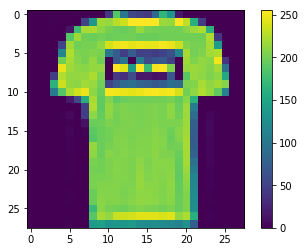

In [11]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

In [12]:
# Q: Why 255.0 not just 255? maybe for the result be a float like 0.55?
train_images = train_images / 255.0
test_images = test_images / 255.0
  

In [13]:
train_images[1][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
       0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

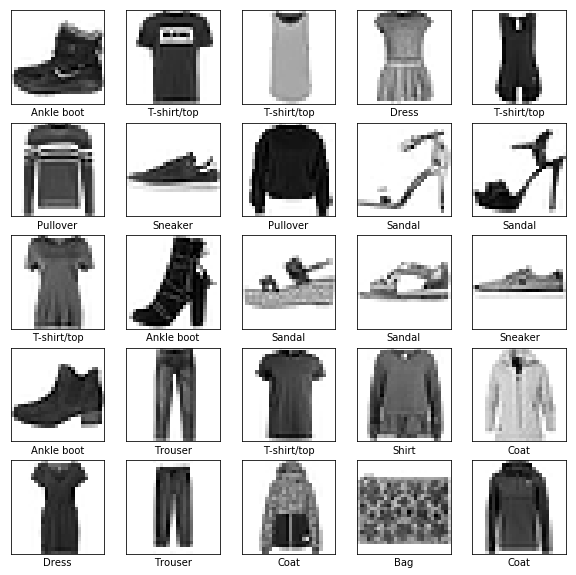

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 144us/step - loss: 0.4955 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.3766 - acc: 0.8632
Epoch 3/5
60000/60000 [==============================] - 8s 139us/step - loss: 0.3400 - acc: 0.8756
Epoch 4/5
60000/60000 [==============================] - 8s 139us/step - loss: 0.3132 - acc: 0.8858
Epoch 5/5
60000/60000 [==============================] - 9s 143us/step - loss: 0.2965 - acc: 0.8915


In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: {}'.format(test_acc) )

10000/10000 [==============================] - 1s 92us/step
Test accuracy: 0.8736


In [19]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([1.4900788e-05, 1.8468104e-07, 7.9414917e-07, 8.9449280e-08,
       1.3117603e-06, 1.1245797e-02, 7.4186443e-07, 1.6823584e-01,
       2.6557207e-04, 8.2023472e-01], dtype=float32)

In [21]:
np.argmax(predictions[1])

2

In [22]:
test_labels[1]

2

In [23]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    print(class_names[true_label])
    plt.xlabel("{0} {1:2.0f}% {2}".format(class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color)


In [26]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Ankle boot


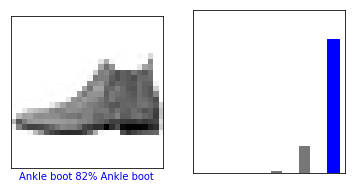

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

Sneaker


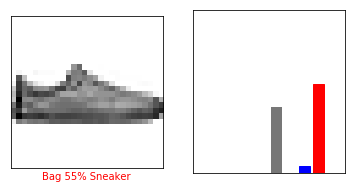

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

Ankle boot
Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Shirt
Sandal
Sneaker
Coat
Sandal
Sneaker
Dress
Coat


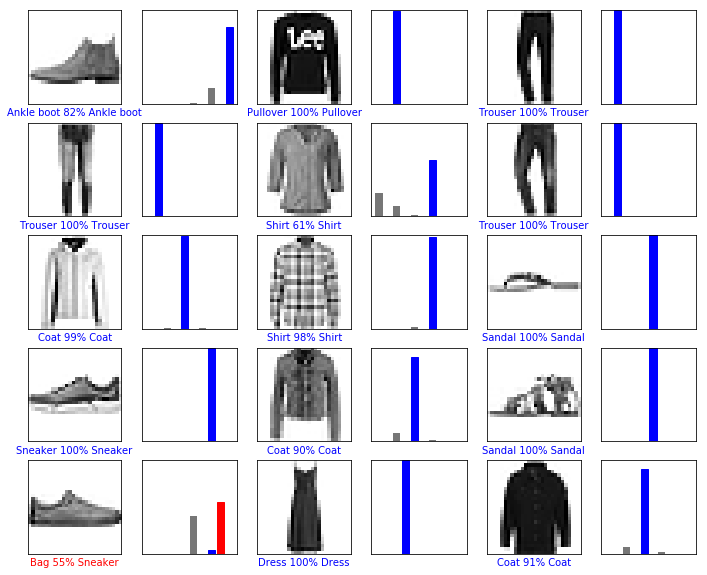

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [30]:
# just a single image
img = test_images[0]

print(img.shape)

(28, 28)


In [31]:
# Batch with one image
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.49007865e-05 1.84681028e-07 7.94148264e-07 8.94492729e-08
  1.31176023e-06 1.12458123e-02 7.41863687e-07 1.68235943e-01
  2.65572075e-04 8.20234656e-01]]


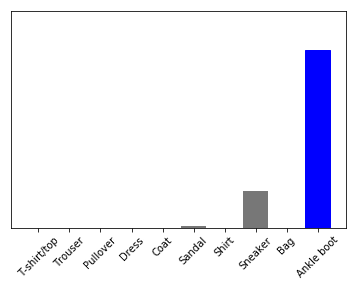

In [34]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [35]:
np.argmax(predictions_single[0])

9